# Global Power Plant (Evaluation Project - 4)

### Problem Statement:

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

#### To download the dataset, use the link given below :

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/23b1612a5792e7e894a41919cf0da66d7d81b908/database_IND.csv

In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset first

database = pd.read_csv("database_IND.csv")
database.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
# Let's drop the columns which is not useful for prediction

database.drop(columns = ["country", "country_long", "name", "url", "gppd_idnr"], axis=1, inplace=True)

In [4]:
# Shape of the dataset

database.shape

(908, 20)

In [5]:
# Quick information about dataset

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               908 non-null    float64
 1   latitude                  862 non-null    float64
 2   longitude                 862 non-null    float64
 3   primary_fuel              908 non-null    object 
 4   other_fuel1               199 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        528 non-null    float64
 8   owner                     342 non-null    object 
 9   source                    908 non-null    object 
 10  geolocation_source        889 non-null    object 
 11  wepp_id                   0 non-null      float64
 12  year_of_capacity_data     520 non-null    float64
 13  generation_gwh_2013       384 non-null    float64
 14  generation

In [6]:
# Let's check the missing values if any...

feature_database = database.isna().sum().keys().tolist()
missing_database = database.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(feature_database, missing_database)),columns= ["Columns", "Missing Values"])
missing_data["Missing %"] = round(((missing_data["Missing Values"]/database.shape[0])*100),2)

missing_data

,Columns,Missing Values,Missing %
0,capacity_mw,0,0.00
1,latitude,46,5.07
2,longitude,46,5.07
3,primary_fuel,0,0.00
4,other_fuel1,709,78.08
5,other_fuel2,907,99.89
6,other_fuel3,908,100.00
7,commissioning_year,380,41.85
8,owner,566,62.33
9,source,0,0.00


Most of the data missed in this dataset.

In [7]:
# let's drop the columns which has missed values more than 40%

for column in database:
    if database[column].isnull().sum()*100.0/database.shape[0]>40:
        database.drop(column,axis=1, inplace=True)

In [8]:
# Let's again check the missing value percentage

feature_database = database.isna().sum().keys().tolist()
missing_database = database.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(feature_database, missing_database)),columns= ["Columns", "Missing Values"])
missing_data["Missing %"] = round(((missing_data["Missing Values"]/database.shape[0])*100),2)

missing_data

,Columns,Missing Values,Missing %
0,capacity_mw,0,0.00
1,latitude,46,5.07
2,longitude,46,5.07
3,primary_fuel,0,0.00
4,source,0,0.00
5,geolocation_source,19,2.09


In [9]:
# Let's check the rows with pending NA

index = database.index[database.isnull().any(axis=1)]
index

Int64Index([ 14,  25,  43,  46,  68,  73, 179, 193, 202, 209, 251, 330, 331,
            333, 387, 421, 423, 431, 436, 441, 467, 479, 480, 484, 503, 539,
            541, 546, 656, 675, 681, 706, 712, 713, 732, 733, 742, 771, 774,
            775, 776, 777, 785, 829, 885, 887],
           dtype='int64')

In [10]:
# Let's drop the NA rows

database.drop(index,axis=0, inplace=True)

In [11]:
# Let's check the null values if any present...

database.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

All null values has been fixed..

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

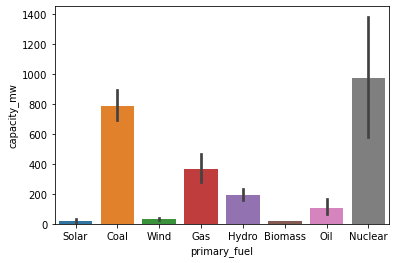

In [12]:
# capacity_mw vs primary_fuel

sns.barplot(y="capacity_mw", x="primary_fuel", data=database)

In [13]:
# Let's check correlation matrix

corr = database.corr()
corr

,capacity_mw,latitude,longitude
capacity_mw,1.000000,0.050107,0.198377
latitude,0.050107,1.000000,0.031501
longitude,0.198377,0.031501,1.000000


<AxesSubplot:>

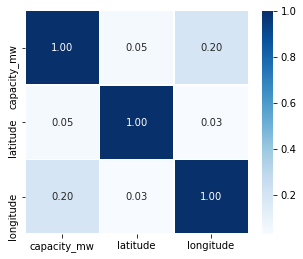

In [14]:
# Let's visualize with heatmap

plt.figure(figsize = (5,5))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10},fmt=".2f",
            linewidth = .2,square=True, cmap="Blues")

Not a single column is correlated to each other.

In [15]:
# Let's check the "0" value counts if any...

for column in database:
    print(column+" = "+str(database[database[column]==0].shape[0]))

capacity_mw = 1
latitude = 0
longitude = 0
primary_fuel = 0
source = 0
geolocation_source = 0


## Prediction : 1 (Fule Type)

In [16]:
# Let' check the skewness

database.skew()

capacity_mw    3.106672
latitude      -0.143622
longitude      1.100942
dtype: float64

In [17]:
# Let's use the zscore technique to remove the skewness

features = ["longitude", "capacity_mw"]

from scipy.stats import zscore

z = np.abs(zscore(database[features]))
database = database[(z<3).all(axis=1)]

In [18]:
# Let's check the skewness again

database.skew()

capacity_mw    1.969321
latitude      -0.112298
longitude      0.942560
dtype: float64

skewness is still pending. let's apply another technique to remove it..

In [19]:
# Removing the skewness

for index in database.skew().index:
    if database.skew().loc[index]>0.5:
        database[index] = np.log1p(database[index])
    if database.skew().loc[index]<-0.5:
        database[index] = np.square(database[index])

In [20]:
# Let's check the skewness again

database.skew()

capacity_mw    0.055108
latitude      -0.112298
longitude      0.767534
dtype: float64

skewness is better than before. Let's analyze the target column...

Coal       237
Hydro      224
Solar      122
Wind       108
Gas         64
Biomass     50
Oil         18
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:ylabel='primary_fuel'>

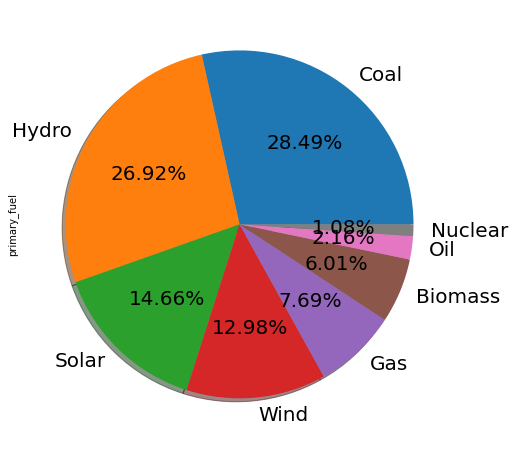

In [21]:
# Let' check if there any class imbalance issue exists or not...

print(database["primary_fuel"].value_counts())
database["primary_fuel"].value_counts().plot.pie(figsize=(8,8), autopct="%.2f%%",shadow=True, fontsize=20)

I can see that class imbalance issue exists.

In [22]:
# Let first convert the target column categorical to numerical

database["primary_fuel"] = database["primary_fuel"].replace({"Nuclear":1, "Oil":2, "Biomass":3, "Gas":4,
                                                            "Wind":5, "Solar":6, "Hydro":7, "Coal":8})

# Let's separate the input and output columns

df_xx = database.drop(columns = ["primary_fuel"], axis=1)
df_yy = database["primary_fuel"]

df_xx

,capacity_mw,latitude,longitude,source,geolocation_source
0,1.252763,28.1839,4.307313,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,4.595120,24.7663,4.325575,Ultratech Cement ltd,WRI
2,3.693867,21.9038,4.253813,CDM,WRI
3,4.912655,23.8712,4.525696,Central Electricity Authority,WRI
4,7.496097,21.9603,4.423757,Central Electricity Authority,WRI
...,...,...,...,...,...
903,7.378384,16.2949,4.361273,Central Electricity Authority,WRI
904,1.386294,12.8932,4.371539,Karnataka Power Corporation Limited,Industry About
905,3.277145,15.2758,4.338350,CDM,WRI
906,4.394449,24.3500,4.314118,Hindustan Zinc ltd,WRI


In [23]:
# Let's convert the categorical column to numerical column


print("Shape before converting the categorical column to numerical",df_xx.shape)
df_xx = pd.get_dummies(df_xx, drop_first=True)
print("Shape after converting the categorical column to numerical",df_xx.shape)

Shape before converting the categorical column to numerical (832, 5)
Shape after converting the categorical column to numerical (832, 195)


Shape when class imbalance issue exists (832, 195)
Shape after solved class imbalance issue (1896, 195)
8    237
7    237
6    237
5    237
4    237
3    237
2    237
1    237
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

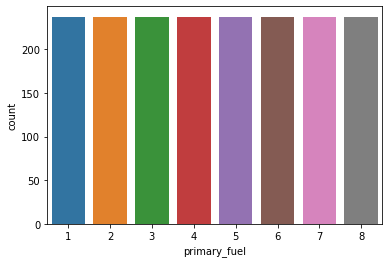

In [25]:
# Let's solve the class imbalance issue using SMOTE technique

from imblearn.over_sampling import SMOTE

print("Shape when class imbalance issue exists", df_xx.shape)

SMT = SMOTE()
df_xx, df_yy = SMT.fit_resample(df_xx, df_yy)

print("Shape after solved class imbalance issue",df_xx.shape)

print(df_yy.value_counts())
sns.countplot(df_yy)

Now the class imbalace has been solved.

Number of components explaining 99% variance :  189


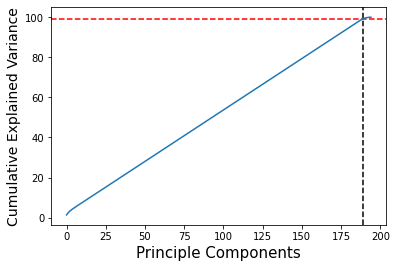

In [26]:
# Let's use the PCA technique

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
xx = scaler.fit_transform(df_xx)

xx_pca = PCA()
xx_pca.fit(xx)

var_cumu = np.cumsum(xx_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99)

print("Number of components explaining 99% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=99, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

189 columns is giving the 99% variance and rest 6 columns giving the 1% variance and not the big difference. So, we are not going to use the PCA becasuse these 6 columns maybe important for best model. Let' use normal StandardScaler for model building.

In [27]:
# Let's import necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from time import time

In [28]:
# Let's find the best model

def bestmodel(model):
    best_score = 0
    best_state = 0
    start = time()
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(xx, df_yy, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        y_pre = model.predict_proba(x_test)
        score = roc_auc_score(y_test, y_pre, multi_class='ovr', average='weighted')
        if score > best_score:
            best_score = score
            best_state = i
    print("Best Random State is      : ",best_state)
    print("Best R2_Score is          : ",best_score)
    print("Cross Validation Score is : ",cross_val_score(model, xx, df_yy, cv=5, scoring='roc_auc_ovr_weighted').mean())
    end = time()
    print("Time taken by model for prediction is : {:.4f} seconds".format(end-start))

#### Let' find the ROC_AUC scores

In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
bestmodel(LR)

Best Random State is      :  89
Best R2_Score is          :  0.9508654179853231
Cross Validation Score is :  0.9323631769798746
Time taken by model for prediction is : 67.7203 seconds


In [30]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Random State is      :  116
Best R2_Score is          :  0.9383988539745817
Cross Validation Score is :  0.9138160026950839
Time taken by model for prediction is : 6.4975 seconds


In [31]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Random State is      :  164
Best R2_Score is          :  0.9727918930875677
Cross Validation Score is :  0.9574173630666472
Time taken by model for prediction is : 11.8747 seconds


In [32]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
bestmodel(BC)

Best Random State is      :  63
Best R2_Score is          :  0.9849537857393459
Cross Validation Score is :  0.9724549586983663
Time taken by model for prediction is : 32.0552 seconds


In [33]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
bestmodel(RFC)

Best Random State is      :  8
Best R2_Score is          :  0.992938592754836
Cross Validation Score is :  0.9867573568903099
Time taken by model for prediction is : 119.1198 seconds


####  After analyzing the ROC AUC Scores and Cross Validation Scores of 5 models. Now it is clear that Random Forest Classifier is giving the best score. Let's try to increase it with HyperparameterTuning if possible...

In [35]:
# Hyper Parameter Tuning

x_train, x_test, y_train, y_test = train_test_split(xx, df_yy, test_size = 0.25, random_state = 8)

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100,200], "criterion":["gini", "entropy"],
             "min_samples_split":[2,3], "min_samples_leaf":[1,2]}

grid_search = GridSearchCV(RFC, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [43]:
# Final Model

x_train, x_test, y_train, y_test = train_test_split(xx, df_yy, test_size = 0.25, random_state = 8)
Final_Class_Model = RandomForestClassifier(n_estimators=100, criterion="gini", min_samples_split=2,min_samples_leaf=1)
Final_Class_Model.fit(x_train, y_train)
y_preds = Final_Class_Model.predict_proba(x_test)
roc_auc_score(y_test, y_preds, multi_class='ovr', average='weighted')

0.9932092743395465

In [44]:
# Saving the Final Model

import joblib

joblib.dump(Final_Class_Model,"Final_Class_Models.pkl")

['Final_Class_Models.pkl']

## Prediction : 2 (capacity_mw)

In [16]:
# Let's check the skewness

database.skew()

capacity_mw    3.106672
latitude      -0.143622
longitude      1.100942
dtype: float64

capacity_mw is our target column.

In [17]:
# Let's use the zscore technique to remove the skewness

features = ["longitude"]

from scipy.stats import zscore

z = np.abs(zscore(database[features]))
database = database[(z<3).all(axis=1)]

In [18]:
# Let's check the skewness again

database.skew()

capacity_mw    3.079289
latitude      -0.121054
longitude      0.893100
dtype: float64

skewness is still pending. So, let's separate the input and output and then apply the another technique

In [19]:
# Let' separate the input and output

df_x = database.drop(columns = ["capacity_mw"], axis=1)
df_y = database["capacity_mw"]

In [20]:
# Removing the skewness

for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index] = np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index] = np.square(df_x[index])

In [21]:
# Let's check the skewness again

df_x.skew()

latitude    -0.121054
longitude    0.720697
dtype: float64

Now the skewness is looking good than before. Let's use one hot encoding technique to convert the categorical columns to numerical columns

In [22]:
# Converting categorical columns to numerical column

df_x = pd.get_dummies(df_x, drop_first=True)

df_x

,latitude,longitude,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,source_ACME Solar Energy,...,source_Vikram Vikram cement,source_Vishwanath Sugars ltd,source_Welspun Solar AP Private Limited,source_Welspun Solar Punjab Private Limited,source_West Bengal Energy Development Corporation Limited (WBEDCL),source_West Coast Paper Mills Ltd.,source_Yashwantrao Krishna ssk,source_Ym Ssk ltd,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,28.1839,4.307313,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.7663,4.325575,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,21.9038,4.253813,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,23.8712,4.525696,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21.9603,4.423757,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,4.361273,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
904,12.8932,4.371539,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
905,15.2758,4.338350,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
906,24.3500,4.314118,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Shape of final dataset

df_x.shape

(849, 201)

Number of components explained 99% variance :  191


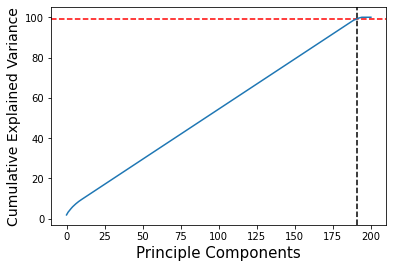

In [24]:
# Let's use the PCA technique

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_x)

x_pca = PCA()
x_pca.fit(x_scaled)
var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99)


print("Number of components explained 99% variance : ",k)
plt.xlabel("Principle Components",fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle = '--')
plt.axhline(y=99, color='r', linestyle = '--')
plt.plot(var_cumu)
plt.show()

Only 191 columns is giving me 99% variance out of 201 columns. So, let's use the normal Standard Scaling for model building because these 10 columns maybe helpful to find the best model..

In [25]:
# Let's import some necessary libraries for model building

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [26]:
# Let's find the best random state

def bestmodel(model):
    best_score = 0
    best_state = 0
    start = time()
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        y_pre = model.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > best_score:
            best_score = score
            best_state = i
    print("Best Random State is      : ",best_state)
    print("Best R2_Score is          :  ",best_score)
    print("Cross Validation Score is : ",cross_val_score(model, x_scaled, df_y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction is : {:.4f} seconds".format(end-start))

In [27]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
bestmodel(DTR)

Best Random State is      :  174
Best R2_Score is          :   0.5815020681127416
Cross Validation Score is :  -0.04181349995174895
Time taken by model for prediction is : 2.7689 seconds


In [31]:
# Format for models

def bestmod(mod):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 174)
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    score = r2_score(y_test, y_pred)
    print("Best R2_Score is : ",score)
    print("Cross Validation Score is : ",cross_val_score(mod, x_scaled, df_y, cv=5, scoring='r2').mean())
    end = time()
    print("Time taken by model for prediction is : {:.4f} seconds".format(end-start))

In [33]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
bestmod(KNR)

Best R2_Score is :  0.18745419733374302
Cross Validation Score is :  -0.4687018033781497
Time taken by model for prediction is : 0.1040 seconds


In [34]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
bestmod(GBR)

Best R2_Score is :  0.5595578721439392
Cross Validation Score is :  0.4297456270537213
Time taken by model for prediction is : 2.5104 seconds


In [35]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
bestmod(RFR)

Best R2_Score is :  0.6290583157536853
Cross Validation Score is :  0.3934164176285811
Time taken by model for prediction is : 4.7423 seconds


#### After analyzing the scores and cross validation scores of 4 model, Random Forest Regressor is giving the best score. Let's try to improve the score using hyperparameter tuning.

In [39]:
# Final Model with HyperParameter Tuning

x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 174)
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100,200], "min_samples_split":[2,3],
             "min_samples_leaf":[1,2],"criterion":["mse", "mae"]}


grid_search = GridSearchCV(RFR, param_grid)
grid_search.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size = 0.25, random_state = 174)
Final_Reg_Model = RandomForestRegressor(n_estimators=100, criterion="mse", min_samples_split=2,min_samples_leaf=1)
Final_Reg_Model.fit(x_train, y_train)
y_preds = Final_Reg_Model.predict(x_test)
r2_score(y_test, y_preds)

0.6408691119858884

In [40]:
# Saving the Final Model

import joblib

joblib.dump(Final_Reg_Model, "Final_Reg_Model.pkl")

['Final_Reg_Model.pkl']